In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import shapely.geometry
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os

current_palette = sns.color_palette()
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

sns.set(rc={'figure.figsize':(10,4)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def save_fig(ax, folder, suffix, format="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig(folder + suffix + "." + format)
    fig.clear()

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
locations = pd.read_csv("locations.csv")

In [9]:
RUN = 3
RESULTS_DIR = os.path.join(".", "results", f"results-test-{RUN}")

In [10]:
files = os.listdir(os.path.join(".", RESULTS_DIR))

df_experiment = pd.DataFrame()
df_complete = pd.DataFrame()

for f in files:

    try:
        client = f[len("cesink"):-len(".ext4-results.csv")]

        df_run = pd.read_csv(os.path.join(".", RESULTS_DIR, f))

        # df_client.dropna(inplace=True)
        # df_run = df_client[["sensor_id", "service_id", "packet_n", "packet_len","send_time1", "recv_time1", "send_time2", "recv_time2"]].copy()

        # df_run["client"] = client

        # convert to milliseconds
        df_run["send_time1"] = df_run["send_time1"] / 1e6
        df_run["send_time2"] = df_run["send_time2"] / 1e6
        df_run["recv_time1"] = df_run["recv_time1"] / 1e6
        df_run["recv_time2"] = df_run["recv_time2"] / 1e6


        df_run["send_latency1"] = df_run["recv_time1"] - df_run["send_time1"]
        df_run["send_latency2"] = df_run["recv_time2"] - df_run["send_time2"]
        df_run["processing_latency"] = df_run["send_time2"] - df_run["recv_time1"]
        df_run["total_latency"] = df_run["recv_time2"] - df_run["send_time1"]

        df_run["latency"] = df_run["recv_time2"] - df_run["send_time1"]

        # print(locations.loc[locations["id"] == client, "lat"].values[0])

        df_complete.append(df_run)

        df_experiment = df_experiment.append(pd.DataFrame({
            "client": client,
            "lat": locations.loc[locations["id"] == client, "lat"].values[0],
            "lng": locations.loc[locations["id"] == client, "lng"].values[0],
            "mean_send_latency1": df_run["send_latency1"].mean(),
            "mean_send_latency2": df_run["send_latency2"].mean(),
            "mean_processing_latency": df_run["processing_latency"].mean(),
            "mean_total_latency": df_run["total_latency"].mean(),
            "median_send_latency1": df_run["send_latency1"].median(),
            "median_send_latency2": df_run["send_latency2"].median(),
            "median_processing_latency": df_run["processing_latency"].median(),
            "median_total_latency": df_run["total_latency"].median(),
            "max_send_latency1": df_run["send_latency1"].max(),
            "max_send_latency2": df_run["send_latency2"].max(),
            "max_processing_latency": df_run["processing_latency"].max(),
            "max_total_latency": df_run["total_latency"].max(),
            "99th_send_latency1": df_run["send_latency1"].quantile(0.99),
            "99th_send_latency2": df_run["send_latency2"].quantile(0.99),
            "99th_processing_latency": df_run["processing_latency"].quantile(0.99),
            "99th_total_latency": df_run["total_latency"].quantile(0.99),
            "95th_send_latency1": df_run["send_latency1"].quantile(0.95),
            "95th_send_latency2": df_run["send_latency2"].quantile(0.95),
            "95th_processing_latency": df_run["processing_latency"].quantile(0.95),
            "95th_total_latency": df_run["total_latency"].quantile(0.95),
        }, index=[0]))

    except Exception as e:
        print(f"Error reading file {f}")
        raise e

df_experiment

,client,lat,lng,mean_send_latency1,mean_send_latency2,mean_processing_latency,mean_total_latency,median_send_latency1,median_send_latency2,median_processing_latency,...,max_processing_latency,max_total_latency,99th_send_latency1,99th_send_latency2,99th_processing_latency,99th_total_latency,95th_send_latency1,95th_send_latency2,95th_processing_latency,95th_total_latency
0,S163,34.407370,-131.10420,11.932207,11.861081,1.213194,25.006483,6.606201,6.307129,0.986816,...,42.349854,70.349121,29.098892,31.253684,4.847522,47.254409,28.748816,30.689465,2.369714,46.327319
0,S962,31.581560,-160.89450,13.460206,19.656649,2.267973,35.384828,17.443481,19.406006,2.117798,...,64.835449,94.764893,21.293484,30.477197,5.184656,51.987385,19.964636,21.531506,3.476404,42.607788
0,S2492,-18.883480,-179.64730,13.997956,19.222962,1.104378,34.325296,16.739136,18.447998,1.007935,...,22.490479,70.085205,20.870625,21.737456,1.670095,42.096584,20.760046,21.234106,1.342969,40.556580
0,S1638,21.406030,176.71310,8.447402,5.652624,1.695288,15.795314,4.484253,5.075073,1.704346,...,8.008301,39.631836,19.212883,18.528091,2.555405,39.395093,19.113794,7.424060,2.320569,28.634094
0,S2110,1.105467,-85.32836,11.221863,13.784880,1.839008,26.845750,7.086914,18.741333,1.500244,...,43.986084,74.680908,33.105000,21.268372,5.282075,54.356724,21.588489,20.946899,3.166284,44.161938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,S1811,30.241670,149.90670,9.156065,11.996727,0.847687,22.000479,5.290405,17.413940,0.786621,...,23.376953,47.675537,20.830813,20.747195,2.722729,42.712351,20.638318,20.552844,1.091345,41.779810
0,S497,53.031850,-149.03370,12.103051,18.486353,1.522506,32.111909,7.058838,19.583496,1.330322,...,43.724854,83.570312,27.500491,27.682285,5.460010,56.408179,26.830042,26.295679,2.459302,53.831067
0,S731,31.108460,-152.27780,13.330397,17.950053,1.989930,33.270380,17.433716,18.677734,1.925781,...,62.007568,90.160156,21.293484,29.921353,4.545063,50.823567,20.134119,20.484875,2.983948,41.033521
0,S134,53.088290,-144.21280,11.923842,20.363188,1.095760,33.382790,6.706299,25.542236,0.891357,...,52.966309,83.577393,29.050803,29.588196,4.751731,57.215952,27.560571,26.861841,2.176135,55.020776


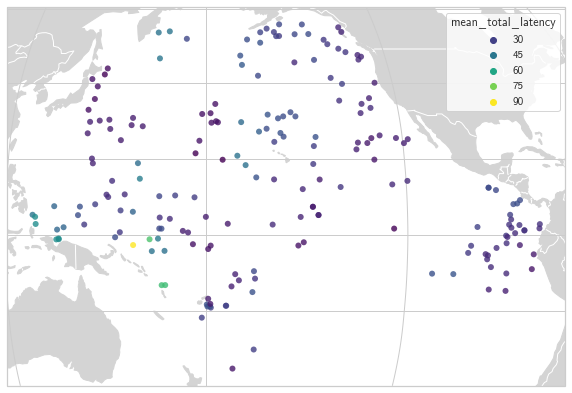

In [11]:
cmap = sns.color_palette("viridis", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': cartopy.crs.Robinson(central_longitude=180)})

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1, edgecolor=("#FFFFFF"))

ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
ax.gridlines()

sns.scatterplot(ax=ax, data=df_experiment, x="lng", y="lat", transform=ccrs.PlateCarree(), palette=cmap, zorder=10, linewidth=0, alpha=0.8, hue="mean_total_latency")

plt.show()

In [12]:
test_df = pd.read_csv(os.path.join(RESULTS_DIR, "cesinkI415.ext4-results.csv"))

test_df["send_time1"] = test_df["send_time1"] / 1e6
test_df["send_time2"] = test_df["send_time2"] / 1e6
test_df["recv_time1"] = test_df["recv_time1"] / 1e6
test_df["recv_time2"] = test_df["recv_time2"] / 1e6

test_df["send_latency1"] = test_df["recv_time1"] - test_df["send_time1"]
test_df["send_latency2"] = test_df["recv_time2"] - test_df["send_time2"]
test_df["processing_latency"] = test_df["send_time2"] - test_df["recv_time1"]

FileNotFoundError: [Errno 2] No such file or directory: './results/results-test-3/cesinkI415.ext4-results.csv'

<AxesSubplot:xlabel='send_time1', ylabel='processing_latency'>

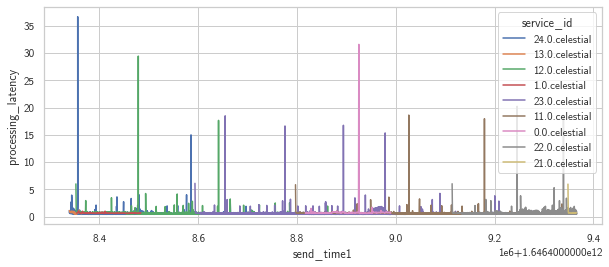

In [ ]:
sns.lineplot(data=test_df, x="send_time1", y="processing_latency", hue="service_id")

In [ ]:
test_df[test_df["processing_latency"] > 100000]

,sensor_id,service_id,packet_n,packet_len,send_time1,recv_time1,send_time2,recv_time2,send_latency1,send_latency2,processing_latency


In [ ]:
# only 99% latency
test_df_filtered = test_df[test_df["processing_latency"] < test_df["processing_latency"].quantile(0.99)]
print(f"Removed {len(test_df) - len(test_df_filtered)} packets of {len(test_df)}")

Removed 160 packets of 16000


<AxesSubplot:xlabel='processing_latency', ylabel='Proportion'>

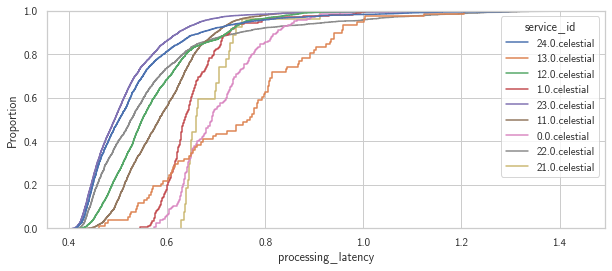

In [ ]:
sns.ecdfplot(data=test_df_filtered, x="processing_latency", hue="service_id")

<AxesSubplot:xlabel='sensor_id', ylabel='count'>

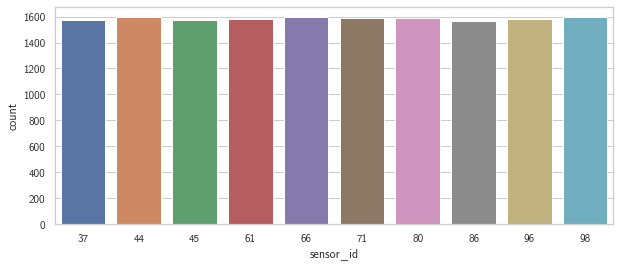

In [ ]:
sns.countplot(data=test_df_filtered, x="sensor_id")

<AxesSubplot:xlabel='send_time1', ylabel='send_latency1'>

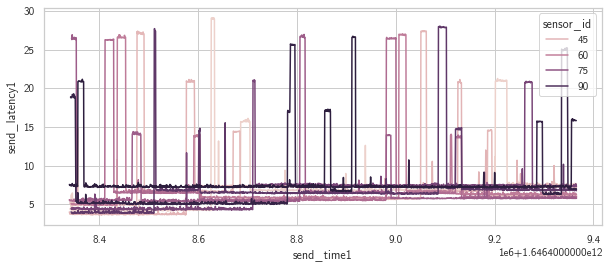

In [ ]:
sns.lineplot(data=test_df, x="send_time1", y="send_latency1", hue="sensor_id")

<AxesSubplot:xlabel='send_time1', ylabel='send_latency2'>

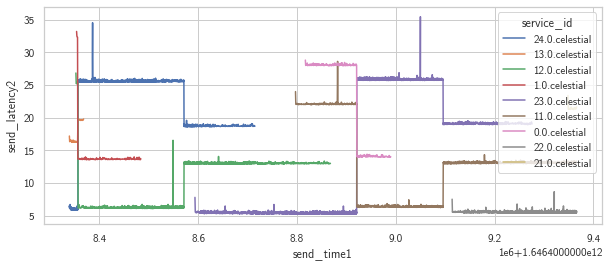

In [ ]:
sns.lineplot(data=test_df, x="send_time1", y="send_latency2", hue="service_id")